In [6]:
import pandas as pd

df = pd.read_csv("BI_Hackathon_Data.csv")
df.isna().sum()
#since some columns have too much missing value, we decide to delter those columns in analyzing
col = ['equalinc','nbgoodc','nbstatus','nbmedia','exbuscon','exreason','bafund','barel','TEAJOBGR','EB_JOBGR','EB_OWNER','TEAOWNER','TEAJOBNOW','EB_JOBNOW','TEACOMPET', 'EB_COMPET','TEANEWPR','EB_NEWPR','TEANEWTEC','EB_NEWTEC','TEAEXPORT','EB_EXPORT']
df = df.drop(columns = col)
print(df)
df.isna().sum()
missingcols = ['knowent','opport','suskill','fearfail', 'futsup','discent','busang','age9c','hhsize']
df = df.dropna( subset = missingcols)
df.isna().sum()
df.to_csv(r'D:\Data Analyst\Babson Hackathon\Hackathon.csv', index = False, header = True)
df.TEA.value_counts()

       yrsurv  WEIGHT_L  WEIGHT_A  GEMHHINC  knowent  opport  suskill  \
0        2011  1.415335  1.470729     68100      0.0    -1.0      0.0   
1        2011  0.971677  1.009707      3467      0.0    -1.0      1.0   
2        2011  2.545694  2.645328      3467      0.0     1.0     -1.0   
3        2011  0.971677  1.009707        33      1.0     1.0      0.0   
4        2011  1.319954  1.371615        -2      0.0     0.0      1.0   
...       ...       ...       ...       ...      ...     ...      ...   
28371    2017  0.942671  0.952578     68100      1.0     1.0      1.0   
28372    2017  1.206530  1.219210        33      0.0     1.0      0.0   
28373    2017  1.053133  1.064201     68100      1.0     1.0      1.0   
28374    2017  1.057164  1.068274        -2      0.0     0.0      0.0   
28375    2017  0.799854  0.808260      3467      0.0     1.0      0.0   

       fearfail  futsup  discent  ...  hhsize  ushhinc  usreduc  ESTBBUSO  \
0           0.0     0.0      0.0  ...     5.0 

0    23101
1     2924
Name: TEA, dtype: int64

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

new_england = df[df['Region'] == 1 ]
new_york = df[df['Region'] == 2 ]
mid_atlantic = df[df['Region'] == 3 ]
southeast = df[df['Region'] == 4 ]
great_lakes = df[df['Region'] == 5 ]
south_central = df[df['Region'] == 6 ]
midwest = df[df['Region'] == 7 ]
mountain_plains = df[df['Region'] == 8 ]
pacific_southwest = df[df['Region'] == 9 ]
pacific_northwest = df[df['Region'] == 10 ]

new_england.to_csv(r'D:\Data Analyst\Babson Hackathon\new_england.csv', index = False, header = True)
new_york.to_csv(r'D:\Data Analyst\Babson Hackathon\new_york.csv', index = False, header = True)
mid_atlantic.to_csv(r'D:\Data Analyst\Babson Hackathon\mid_atlantic.csv', index = False, header = True)
southeast.to_csv(r'D:\Data Analyst\Babson Hackathon\southeast.csv', index = False, header = True)
great_lakes.to_csv(r'D:\Data Analyst\Babson Hackathon\great_lakes.csv', index = False, header = True)
south_central.to_csv(r'D:\Data Analyst\Babson Hackathon\south_central.csv', index = False, header = True)
midwest.to_csv(r'D:\Data Analyst\Babson Hackathon\midwest.csv', index = False, header = True)
mountain_plains.to_csv(r'D:\Data Analyst\Babson Hackathon\mountain_plains.csv', index = False, header = True)
pacific_southwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_southwest.csv', index = False, header = True)
pacific_northwest.to_csv(r'D:\Data Analyst\Babson Hackathon\pacific_northwest.csv', index = False, header = True)

In [8]:
#linear regression
new_england = pd.read_csv("new_england.csv")
new_england_without_weight = new_england.drop(columns = ['Region','TEANEC','TEAOPP'])
model_ols = smf.ols("TEA ~ yrsurv+GEMHHINC+knowent+opport+suskill+fearfail+futsup+discent+busang+gender+age9c+hhsize+ushhinc+usreduc+ESTBBUSO+IPACTLD_ALL+race", data=new_england_without_weight).fit()
print(model_ols.summary())
 
 

                            OLS Regression Results                            
Dep. Variable:                    TEA   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     7.939
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           6.28e-19
Time:                        03:15:26   Log-Likelihood:                -150.76
No. Observations:                 980   AIC:                             337.5
Df Residuals:                     962   BIC:                             425.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7694     10.759      1.094      

In [9]:
#linear regression with weight
y=new_england_without_weight['TEA']
y=y.tolist()
new_cols = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england_without_weight[new_cols]

## add a intercept point
x = sm.add_constant(x)
 
## Compute the weight and add it to the column named "weight_1"
 
model_wls_1 = sm.WLS(y, x, new_england_without_weight['WEIGHT_A'])
mod_res_1 = model_wls_1.fit()
print(mod_res_1.summary())



                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.082
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.43e-19
Time:                        03:15:26   Log-Likelihood:                -217.29
No. Observations:                 980   AIC:                             470.6
Df Residuals:                     962   BIC:                             558.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.2033     10.913      0.935      

LightGBM Model accuracy score: 0.8946
Training-set accuracy score: 0.9985
Training set score: 0.9985
Test set score: 0.8946
Confusion matrix

 [[259  11]
 [ 20   4]]

True Positives(TP) =  259

True Negatives(TN) =  4

False Positives(FP) =  11

False Negatives(FN) =  20
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       270
           1       0.27      0.17      0.21        24

    accuracy                           0.89       294
   macro avg       0.60      0.56      0.57       294
weighted avg       0.87      0.89      0.88       294



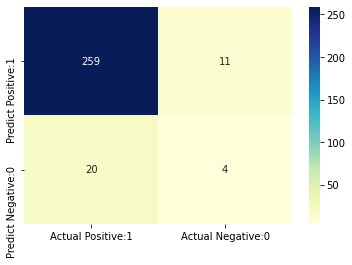

In [12]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

new_england['TEA'].value_counts()

#Declare feature vector and target variable
y=new_england['TEA']

new_cols = ['yrsurv','GEMHHINC','knowent','opport','suskill','fearfail','futsup','discent','busang','gender','age9c','hhsize','ushhinc','usreduc','ESTBBUSO','IPACTLD_ALL','race']
x=new_england[new_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# build the lightgbm model
!pip install lightgbm
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
log_regression = 